## Predict Posture using pretrained model

Left Knee Angle: -110.85
Right Knee Angle: -119.74
Left Hip Angle: 19.66
Right Hip Angle: 60.26
Posture: Sitting


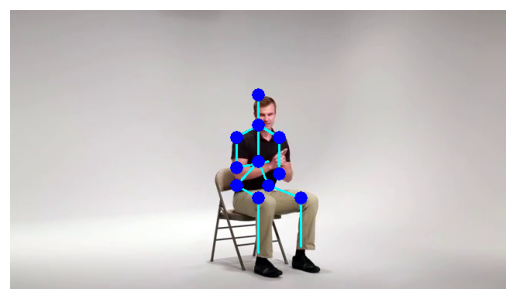

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    # Calculate the angle using vector mathematics
    ba = np.array(a) - np.array(b)
    bc = np.array(c) - np.array(b)
    angle = np.arctan2(np.cross(ba, bc), np.dot(ba, bc))
    return np.degrees(angle)

# Load image
image = cv2.imread("test2.png")

# Load model
protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0, 1], [1, 2], [2, 3], [3, 4],
              [1, 5], [5, 6], [6, 7], [1, 14],
              [14, 8], [8, 9], [9, 10], [14, 11],
              [11, 12], [12, 13]]

# Load model and Forward Pass
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
blob = cv2.dnn.blobFromImage(image, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
net.setInput(blob)
output = net.forward()

# X and Y Scale
height, width, _ = image.shape
scaleX = width / output.shape[3]
scaleY = height / output.shape[2]

# Empty list to store the detected keypoints
points = []

# Threshold
threshold = 0.1

for i in range(nPoints):
    # Obtain probability map
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap
    _, prob, _, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]
    
    if prob > threshold:
        points.append((int(x), int(y)))
    else:
        points.append(None)

# Draw skeleton
imSkeleton = image.copy()
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]
    
    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

# Check posture based on angles
left_knee_angle = None
right_knee_angle = None
left_hip_angle = None
right_hip_angle = None

if points[11] is not None and points[12] is not None and points[13] is not None: # Left hip, knee and ankle
    left_knee_angle = calculate_angle(points[11], points[12], points[13])
    print(f"Left Knee Angle: {left_knee_angle:.2f}")

if points[8] is not None and points[9] is not None and points[10] is not None: # Right hip, knee and ankle
    right_knee_angle = calculate_angle(points[8], points[9], points[10])
    print(f"Right Knee Angle: {right_knee_angle:.2f}")

if points[11] is not None and points[12] is not None and points[14] is not None: 
    left_hip_angle = calculate_angle(points[11], points[12], points[14])
    print(f"Left Hip Angle: {left_hip_angle:.2f}")

if points[8] is not None and points[9] is not None and points[14] is not None:
    right_hip_angle = calculate_angle(points[8], points[9], points[14])
    print(f"Right Hip Angle: {right_hip_angle:.2f}")

# Determine posture based on angles
if (left_knee_angle is not None and left_knee_angle < 90) or (right_knee_angle is not None and right_knee_angle < 90):
    posture = "Sitting"

elif (left_knee_angle is not None and left_knee_angle > 100) or (right_knee_angle is not None and right_knee_angle > 100):    
    posture = "Standing"
else:
    posture = "Unknown"

print(f"Posture: {posture}")
# Show image with skeleton
plt.imshow(imSkeleton[..., ::-1])
plt.axis('off')
plt.show()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    # Calculate the angle using vector mathematics
    ba = np.array(a) - np.array(b)
    bc = np.array(c) - np.array(b)
    angle = np.arctan2(np.cross(ba, bc), np.dot(ba, bc))
    return np.degrees(angle)

# Load model
protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0, 1], [1, 2], [2, 3], [3, 4],
              [1, 5], [5, 6], [6, 7], [1, 14],
              [14, 8], [8, 9], [9, 10], [14, 11],
              [11, 12], [12, 13]]


# Function to predict posture (dummy function for demonstration)
def predict_posture(frame):
    # Load model and Forward Pass
    net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
    blob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(blob)
    output = net.forward()

    # X and Y Scale
    #height, width, _ = frame.shape
    scaleX = frame_width / output.shape[3]
    scaleY = frame_height / output.shape[2]

    # Empty list to store the detected keypoints
    points = []

    # Threshold
    threshold = 0.1

    for i in range(nPoints):
        # Obtain probability map
        probMap = output[0, i, :, :]

        # Find global maxima of the probMap
        _, prob, _, point = cv2.minMaxLoc(probMap)

        # Scale the point to fit on the original image
        x = scaleX * point[0]
        y = scaleY * point[1]

        if prob > threshold:
            points.append((int(x), int(y)))
        else:
            points.append(None)

    # Draw skeleton
    imSkeleton = frame.copy()
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)
            cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

    # Check posture based on angles
    left_knee_angle = None
    right_knee_angle = None
    left_hip_angle = None
    right_hip_angle = None

    if points[11] is not None and points[12] is not None and points[13] is not None: # Left hip, knee and ankle
        left_knee_angle = calculate_angle(points[11], points[12], points[13])
        #print(f"Left Knee Angle: {left_knee_angle:.2f}")

    if points[8] is not None and points[9] is not None and points[10] is not None: # Right hip, knee and ankle
        right_knee_angle = calculate_angle(points[8], points[9], points[10])
        print(f"Right Knee Angle: {right_knee_angle:.2f}")

    if points[11] is not None and points[12] is not None and points[14] is not None: 
        left_hip_angle = calculate_angle(points[11], points[12], points[14])
        #print(f"Left Hip Angle: {left_hip_angle:.2f}")

    if points[8] is not None and points[9] is not None and points[14] is not None:
        right_hip_angle = calculate_angle(points[8], points[9], points[14])
        print(f"Right Hip Angle: {right_hip_angle:.2f}")

    posture = "Unknown"
    
    # Determine posture based on angles
    if (left_knee_angle is not None and abs(left_knee_angle) <125) or (right_knee_angle is not None and abs(right_knee_angle) < 125):
        posture = "Sitting"

    elif (left_knee_angle is not None and abs(left_knee_angle) > 150) or (right_knee_angle is not None and abs(right_knee_angle) > 150):    
        posture = "Standing"
        
    elif (left_knee_angle is None) and (right_knee_angle is None):
        
        if (right_hip_angle is not None and abs(right_hip_angle) > 28) or (left_hip_angle is not None and abs(left_hip_angle) > 28):
            posture = "Sitting"
        if (right_hip_angle is not None and abs(right_hip_angle) < 15) or (left_hip_angle is not None and abs(left_hip_angle) < 15):
            posture = "Standing"
        
    else:
        posture = "Unknown"

    return posture  

# Load the video
input_video_path = 'SitStand.mp4'
output_video_path = 'SitStand_with_posture.mp4'

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID' for .avi
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Predict posture for the current frame
    posture = predict_posture(frame)

    # Overlay the predicted posture on the frame
    cv2.putText(frame, posture, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Write the modified frame to the output video
    out.write(frame)

    # Optional: Display the frame (remove if not needed)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

Right Hip Angle: 31.51
Right Hip Angle: 31.51
Right Hip Angle: 31.51
Right Hip Angle: 31.51
Right Hip Angle: 31.51
Right Hip Angle: 30.60
Right Hip Angle: 35.90
Right Hip Angle: 30.60
Right Hip Angle: 34.68
Right Hip Angle: 30.60
Right Hip Angle: 35.14
Right Hip Angle: 34.68
Right Hip Angle: 30.60
Right Hip Angle: 35.14
Right Hip Angle: 35.90
Right Hip Angle: 35.82
Right Hip Angle: 35.82
Right Hip Angle: 35.82
Right Hip Angle: 35.14
Right Hip Angle: 35.82
Right Hip Angle: 40.91
Right Hip Angle: 43.81
Right Hip Angle: 40.86
Right Hip Angle: 45.82
Right Hip Angle: 54.81
Right Hip Angle: 48.88
Right Hip Angle: 60.00
Right Hip Angle: 69.18
Right Hip Angle: 60.22
Right Knee Angle: -96.84
Right Hip Angle: 56.49
Right Knee Angle: -106.08
Right Hip Angle: 56.49
Right Knee Angle: -109.82
Right Hip Angle: 52.75
Right Knee Angle: -115.85
Right Hip Angle: 48.12
Right Knee Angle: -119.55
Right Hip Angle: 44.42
Right Knee Angle: -123.00
Right Hip Angle: 42.17
Right Knee Angle: -116.96
Right Hip Angl